## Machine Learning with Python (Classifier Model with MLP)

* ### Required Libraries

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

import keras
from keras.models import Model, Sequential
from keras.layers import *
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier

## Data Preprocessing

* ### Importing Dataset

In [2]:
#Training Dataset
dataset_train = pd.read_csv('dataset/optdigits.tra', header=None)

dataset_feautes = dataset_train.iloc[:,:-1].values
dataset_labels = dataset_train.iloc[:,-1].values

In [3]:
dataset_train.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [4]:
dataset_feautes

array([[ 0,  1,  6, ...,  1,  0,  0],
       [ 0,  0, 10, ...,  3,  0,  0],
       [ 0,  0,  8, ...,  0,  0,  0],
       ...,
       [ 0,  0,  3, ...,  9,  0,  0],
       [ 0,  0,  6, ..., 16,  5,  0],
       [ 0,  0,  2, ...,  0,  0,  0]], dtype=int64)

In [5]:
dataset_feautes.shape

(3823, 64)

In [6]:
dataset_labels

array([0, 0, 7, ..., 6, 6, 7], dtype=int64)

In [7]:
dataset_labels.shape

(3823,)

In [8]:
#Test Dataset
dataset_test = pd.read_csv('dataset/optdigits.tes', header=None)

dataset_feautes_test = dataset_test.iloc[:,:-1].values
dataset_labels_test = dataset_test.iloc[:,-1].values

In [9]:
dataset_test

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1793,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1794,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1795,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [10]:
dataset_feautes_test

array([[ 0,  0,  5, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 10,  0,  0],
       [ 0,  0,  0, ..., 16,  9,  0],
       ...,
       [ 0,  0,  1, ...,  6,  0,  0],
       [ 0,  0,  2, ..., 12,  0,  0],
       [ 0,  0, 10, ..., 12,  1,  0]], dtype=int64)

In [11]:
dataset_labels_test

array([0, 1, 2, ..., 8, 9, 8], dtype=int64)

In [12]:
dataset_labels_test.shape

(1797,)

* ### Splitting the Training Set into Training & Validation Set

In [13]:
X_train, X_val, y_train, y_val = train_test_split(dataset_feautes, dataset_labels, 
                                                  test_size = 0.2,
                                                  random_state = 42)

In [14]:
print(X_train.shape, X_val.shape)

(3058, 64) (765, 64)


In [15]:
X_test = dataset_feautes_test.reshape(1797, 64)

In [16]:
X_test.shape

(1797, 64)

* ### Normalization

In [17]:
X_train[1]

array([ 0,  1, 10, 13, 10,  1,  0,  0,  0,  6, 14,  4, 10, 15,  2,  0,  0,
        8, 12,  0,  2, 16,  3,  0,  0,  2, 14,  8, 10, 16,  4,  0,  0,  0,
        2,  4,  4, 13,  6,  0,  0,  0,  0,  0,  0, 12,  8,  0,  0,  6, 12,
        2,  6, 16,  4,  0,  0,  1, 10, 16, 13,  5,  0,  0], dtype=int64)

In [18]:
print((min(X_train[1]), max(X_train[1])))

(0, 16)


In [19]:
X_train

array([[ 0,  0, 13, ...,  0,  0,  0],
       [ 0,  1, 10, ...,  5,  0,  0],
       [ 0,  0,  3, ..., 14, 10,  0],
       ...,
       [ 0,  0, 10, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  7,  0,  0],
       [ 0,  0,  7, ..., 12,  2,  0]], dtype=int64)

In [20]:
# Feature Normalization 
X_train = X_train.astype('float32') 
X_val= X_val.astype('float32') 
X_test = X_test.astype('float32')

X_train /= 16 
X_val   /= 16 
X_test  /= 16

In [21]:
X_train

array([[0.    , 0.    , 0.8125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.0625, 0.625 , ..., 0.3125, 0.    , 0.    ],
       [0.    , 0.    , 0.1875, ..., 0.875 , 0.625 , 0.    ],
       ...,
       [0.    , 0.    , 0.625 , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.4375, 0.    , 0.    ],
       [0.    , 0.    , 0.4375, ..., 0.75  , 0.125 , 0.    ]],
      dtype=float32)

In [22]:
X_val

array([[0.    , 0.    , 0.4375, ..., 0.9375, 0.1875, 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.25  , 0.    ],
       [0.    , 0.0625, 0.5   , ..., 0.25  , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.375 , 0.    , 0.    ]],
      dtype=float32)

In [23]:
X_test

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]],
      dtype=float32)

* ### One-Hot Encoding

In [24]:
print(y_train[0])
print(y_train[34]) 
print(y_train[1075])

8
3
1


In [25]:
#One-Hot Encoding with Keras
y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)

In [26]:
print(y_train[0])
print(y_train[34]) 
print(y_train[1075])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


## Model Training

* ### Multilayer Perceptron (MLP)

 ## <u>Model 1</u>

In [27]:
num__of_digits = 10

model = Sequential()
model.add(Dense(200, input_dim=64, activation='relu', name='Hidden_Layer_1'))
model.add(Dense(100, activation='relu', name='Hidden_Layer_2'))
model.add(Dense(100, activation='relu', name='Hidden_Layer_3'))
model.add(Dense(200, activation='relu', name='Hidden_Layer_4'))
model.add(Dense(num__of_digits, activation='softmax', name='Output_Layer'))

# Input Layer - 4 Hidden Layer - Output Layer

In [28]:
print("MODEL SUMMARY\n")

model.summary()

MODEL SUMMARY

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_Layer_1 (Dense)       (None, 200)               13000     
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               20100     
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 100)               10100     
_________________________________________________________________
Hidden_Layer_4 (Dense)       (None, 200)               20200     
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                2010      
Total params: 65,410
Trainable params: 65,410
Non-trainable params: 0
_________________________________________________________________


* ### Compiling of the Model

In [29]:
# Defining learning rate
learning_rate = 0.1

sgd = optimizers.SGD(lr=learning_rate)

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
# Defining batch and epoch sizes
batch_size = 32
epochs = 25

history  =  model.fit(X_train, y_train,
                      batch_size = batch_size,
                      epochs = epochs,
                      validation_data=(X_val, y_val),
                      verbose=2)

Epoch 1/25
96/96 - 1s - loss: 2.2628 - accuracy: 0.1593 - val_loss: 2.2062 - val_accuracy: 0.2261
Epoch 2/25
96/96 - 0s - loss: 2.1503 - accuracy: 0.3803 - val_loss: 2.0638 - val_accuracy: 0.6118
Epoch 3/25
96/96 - 0s - loss: 1.9500 - accuracy: 0.6606 - val_loss: 1.7843 - val_accuracy: 0.7412
Epoch 4/25
96/96 - 0s - loss: 1.5605 - accuracy: 0.7610 - val_loss: 1.3012 - val_accuracy: 0.8196
Epoch 5/25
96/96 - 0s - loss: 1.0507 - accuracy: 0.8316 - val_loss: 0.8490 - val_accuracy: 0.8824
Epoch 6/25
96/96 - 0s - loss: 0.6981 - accuracy: 0.8797 - val_loss: 0.5818 - val_accuracy: 0.8954
Epoch 7/25
96/96 - 0s - loss: 0.4986 - accuracy: 0.9039 - val_loss: 0.4383 - val_accuracy: 0.9203
Epoch 8/25
96/96 - 0s - loss: 0.3811 - accuracy: 0.9241 - val_loss: 0.3638 - val_accuracy: 0.9111
Epoch 9/25
96/96 - 0s - loss: 0.3096 - accuracy: 0.9339 - val_loss: 0.2888 - val_accuracy: 0.9386
Epoch 10/25
96/96 - 0s - loss: 0.2640 - accuracy: 0.9379 - val_loss: 0.2509 - val_accuracy: 0.9359
Epoch 11/25
96/96 -

In [31]:
best_val_accuracy = max(history.history['val_accuracy'])
print("Best Validation Accuracy: %",best_val_accuracy*100)

Best Validation Accuracy: % 96.86274528503418


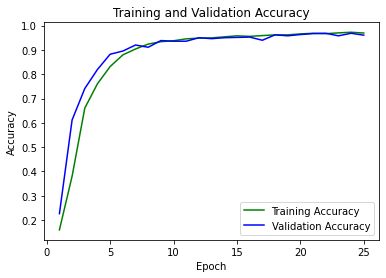

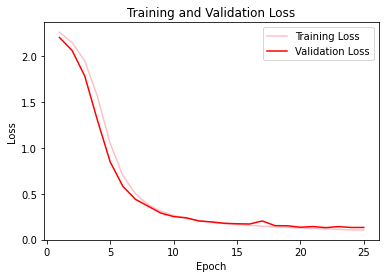

In [32]:
#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

 ## <u>Model 2</u>

In [49]:
num__of_digits = 10

model2 = Sequential()
model2.add(Dense(200, input_dim=64, activation='relu', name='Hidden_Layer_1'))
model2.add(Dense(100, activation='relu', name='Hidden_Layer_2'))
model2.add(Dense(100, activation='relu', name='Hidden_Layer_3'))
model2.add(Dense(200, activation='relu', name='Hidden_Layer_4'))
model2.add(Dense(num__of_digits, activation='softmax', name='Output_Layer'))

# Input Layer - 4 Hidden Layer - Output Layer

In [50]:
print("MODEL SUMMARY\n")

model2.summary()

MODEL SUMMARY

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_Layer_1 (Dense)       (None, 200)               13000     
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               20100     
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 100)               10100     
_________________________________________________________________
Hidden_Layer_4 (Dense)       (None, 200)               20200     
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                2010      
Total params: 65,410
Trainable params: 65,410
Non-trainable params: 0
_________________________________________________________________


* ### Compiling of the Model

In [51]:
# Defining learning rate
learning_rate = 0.1

# We use Adam optimizer for Model 2.
adam = optimizers.Adam(lr=learning_rate)

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
# Defining batch and epoch sizes
batch_size = 32
epochs = 25

history  =  model2.fit(X_train, y_train,
                      batch_size = batch_size,
                      epochs = epochs,
                      validation_data=(X_val, y_val),
                      verbose=2)

Epoch 1/25
96/96 - 1s - loss: 0.8284 - accuracy: 0.7695 - val_loss: 0.2438 - val_accuracy: 0.9268
Epoch 2/25
96/96 - 0s - loss: 0.1716 - accuracy: 0.9467 - val_loss: 0.1430 - val_accuracy: 0.9634
Epoch 3/25
96/96 - 0s - loss: 0.0989 - accuracy: 0.9725 - val_loss: 0.1665 - val_accuracy: 0.9582
Epoch 4/25
96/96 - 0s - loss: 0.0913 - accuracy: 0.9725 - val_loss: 0.1301 - val_accuracy: 0.9608
Epoch 5/25
96/96 - 0s - loss: 0.0784 - accuracy: 0.9771 - val_loss: 0.0921 - val_accuracy: 0.9765
Epoch 6/25
96/96 - 0s - loss: 0.0480 - accuracy: 0.9856 - val_loss: 0.1092 - val_accuracy: 0.9660
Epoch 7/25
96/96 - 0s - loss: 0.0625 - accuracy: 0.9768 - val_loss: 0.0802 - val_accuracy: 0.9765
Epoch 8/25
96/96 - 0s - loss: 0.0338 - accuracy: 0.9908 - val_loss: 0.0779 - val_accuracy: 0.9804
Epoch 9/25
96/96 - 0s - loss: 0.0194 - accuracy: 0.9944 - val_loss: 0.0780 - val_accuracy: 0.9752
Epoch 10/25
96/96 - 0s - loss: 0.0166 - accuracy: 0.9948 - val_loss: 0.0757 - val_accuracy: 0.9791
Epoch 11/25
96/96 -

In [53]:
best_val_accuracy = max(history.history['val_accuracy'])
print("Best Validation Accuracy: %",best_val_accuracy*100)

Best Validation Accuracy: % 98.562091588974


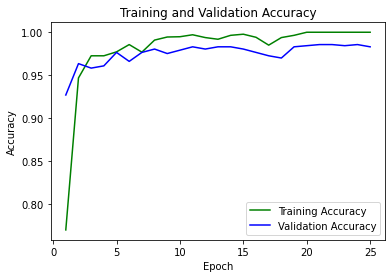

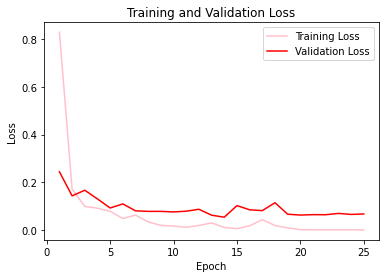

In [54]:
#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

 ## <u>Model 3</u>

In [55]:
num__of_digits = 10

model3 = Sequential()
model3.add(Dense(200, input_dim=64, activation='relu', name='Hidden_Layer_1'))
model3.add(Dense(100, activation='relu', name='Hidden_Layer_2'))
model3.add(Dense(100, activation='relu', name='Hidden_Layer_3'))
model3.add(Dense(200, activation='relu', name='Hidden_Layer_4'))
model3.add(Dense(num__of_digits, activation='softmax', name='Output_Layer'))

# Input Layer - 4 Hidden Layer - Output Layer

In [56]:
print("MODEL SUMMARY\n")

model3.summary()

MODEL SUMMARY

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_Layer_1 (Dense)       (None, 200)               13000     
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               20100     
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 100)               10100     
_________________________________________________________________
Hidden_Layer_4 (Dense)       (None, 200)               20200     
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                2010      
Total params: 65,410
Trainable params: 65,410
Non-trainable params: 0
_________________________________________________________________


* ### Compiling of the Model

In [57]:
# Defining learning rate
# We use lr=0.01 for Model 3.
learning_rate = 0.01

# We use Adam optimizer for Model 3.
adam = optimizers.Adam(lr=learning_rate)

model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
# Defining batch and epoch sizes
batch_size = 32
epochs = 25

history  =  model3.fit(X_train, y_train,
                      batch_size = batch_size,
                      epochs = epochs,
                      validation_data=(X_val, y_val),
                      verbose=2)

Epoch 1/25
96/96 - 1s - loss: 0.8805 - accuracy: 0.7498 - val_loss: 0.2613 - val_accuracy: 0.9242
Epoch 2/25
96/96 - 0s - loss: 0.1721 - accuracy: 0.9490 - val_loss: 0.1400 - val_accuracy: 0.9673
Epoch 3/25
96/96 - 0s - loss: 0.1035 - accuracy: 0.9686 - val_loss: 0.1206 - val_accuracy: 0.9712
Epoch 4/25
96/96 - 0s - loss: 0.0853 - accuracy: 0.9729 - val_loss: 0.0934 - val_accuracy: 0.9725
Epoch 5/25
96/96 - 0s - loss: 0.0647 - accuracy: 0.9814 - val_loss: 0.1411 - val_accuracy: 0.9608
Epoch 6/25
96/96 - 0s - loss: 0.0591 - accuracy: 0.9804 - val_loss: 0.0994 - val_accuracy: 0.9699
Epoch 7/25
96/96 - 0s - loss: 0.0491 - accuracy: 0.9846 - val_loss: 0.0940 - val_accuracy: 0.9791
Epoch 8/25
96/96 - 0s - loss: 0.0318 - accuracy: 0.9902 - val_loss: 0.2255 - val_accuracy: 0.9451
Epoch 9/25
96/96 - 0s - loss: 0.0437 - accuracy: 0.9859 - val_loss: 0.0904 - val_accuracy: 0.9725
Epoch 10/25
96/96 - 0s - loss: 0.0321 - accuracy: 0.9902 - val_loss: 0.1614 - val_accuracy: 0.9595
Epoch 11/25
96/96 -

In [59]:
best_val_accuracy = max(history.history['val_accuracy'])
print("Best Validation Accuracy: %",best_val_accuracy*100)

Best Validation Accuracy: % 98.69281053543091


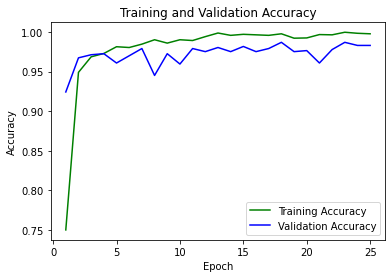

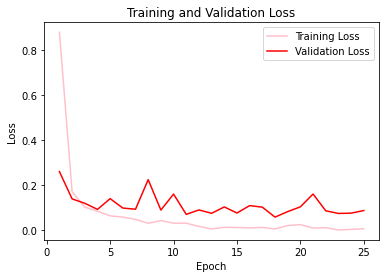

In [60]:
#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

 ## <u>Model 4</u>

In [72]:
num__of_digits = 10

# We add one mode hidden layer for 4th Model.

model4 = Sequential()
model4.add(Dense(200, input_dim=64, activation='relu', name='Hidden_Layer_1'))
model4.add(Dense(100, activation='relu', name='Hidden_Layer_2'))
model4.add(Dense(100, activation='relu', name='Hidden_Layer_3'))
model4.add(Dense(200, activation='relu', name='Hidden_Layer_4'))
model4.add(Dense(100, activation='relu', name='Hidden_Layer_5'))
model4.add(Dense(num__of_digits, activation='softmax', name='Output_Layer'))

# Input Layer - 5 Hidden Layer - Output Layer

In [73]:
print("MODEL SUMMARY\n")

model4.summary()

MODEL SUMMARY

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_Layer_1 (Dense)       (None, 200)               13000     
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               20100     
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 100)               10100     
_________________________________________________________________
Hidden_Layer_4 (Dense)       (None, 200)               20200     
_________________________________________________________________
Hidden_Layer_5 (Dense)       (None, 100)               20100     
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                1010      
Total params: 84,510
Trainable params: 84,510
Non-trainable params: 0
___________________________________

* ### Compiling of the Model

In [74]:
# Defining learning rate
learning_rate = 0.01

# We use Adam optimizer for Model 4.
adam = optimizers.Adam(lr=learning_rate)

model4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
# Defining batch and epoch sizes
batch_size = 32
epochs = 25

history  =  model4.fit(X_train, y_train,
                      batch_size = batch_size,
                      epochs = epochs,
                      validation_data=(X_val, y_val),
                      verbose=2)

Epoch 1/25
96/96 - 1s - loss: 0.8823 - accuracy: 0.7459 - val_loss: 0.1846 - val_accuracy: 0.9490
Epoch 2/25
96/96 - 0s - loss: 0.1702 - accuracy: 0.9523 - val_loss: 0.1510 - val_accuracy: 0.9608
Epoch 3/25
96/96 - 0s - loss: 0.1174 - accuracy: 0.9634 - val_loss: 0.1433 - val_accuracy: 0.9686
Epoch 4/25
96/96 - 0s - loss: 0.0934 - accuracy: 0.9680 - val_loss: 0.1321 - val_accuracy: 0.9569
Epoch 5/25
96/96 - 0s - loss: 0.0552 - accuracy: 0.9820 - val_loss: 0.0943 - val_accuracy: 0.9712
Epoch 6/25
96/96 - 0s - loss: 0.0633 - accuracy: 0.9817 - val_loss: 0.0838 - val_accuracy: 0.9765
Epoch 7/25
96/96 - 0s - loss: 0.0358 - accuracy: 0.9899 - val_loss: 0.0809 - val_accuracy: 0.9765
Epoch 8/25
96/96 - 0s - loss: 0.0372 - accuracy: 0.9863 - val_loss: 0.0920 - val_accuracy: 0.9765
Epoch 9/25
96/96 - 0s - loss: 0.0286 - accuracy: 0.9892 - val_loss: 0.0593 - val_accuracy: 0.9843
Epoch 10/25
96/96 - 0s - loss: 0.0320 - accuracy: 0.9899 - val_loss: 0.0976 - val_accuracy: 0.9752
Epoch 11/25
96/96 -

In [76]:
best_val_accuracy = max(history.history['val_accuracy'])
print("Best Validation Accuracy: %",best_val_accuracy*100)

Best Validation Accuracy: % 98.82352948188782


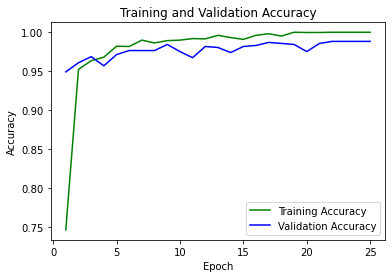

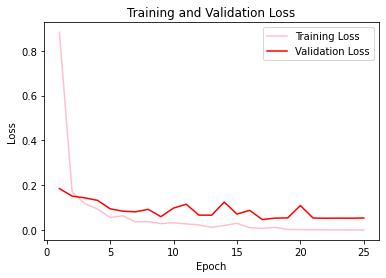

In [77]:
#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

 ## <u>Model 5</u>

In [96]:
num__of_digits = 10

# We add Dropout layers to prevent overfitting.

model5 = Sequential()
model5.add(Dense(200, input_dim=64, activation='relu', name='Hidden_Layer_1'))
model5.add(Dropout(0.3))
model5.add(Dense(100, activation='relu', name='Hidden_Layer_2'))
model5.add(Dropout(0.3))
model5.add(Dense(100, activation='relu', name='Hidden_Layer_3'))
model5.add(Dropout(0.3))
model5.add(Dense(200, activation='relu', name='Hidden_Layer_4'))
model5.add(Dropout(0.3))
model5.add(Dense(100, activation='relu', name='Hidden_Layer_5'))
model5.add(Dense(num__of_digits, activation='softmax', name='Output_Layer'))

# Input Layer - 5 Hidden Layer - Output Layer

In [97]:
print("MODEL SUMMARY\n")

model5.summary()

MODEL SUMMARY

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_Layer_1 (Dense)       (None, 200)               13000     
_________________________________________________________________
dropout_16 (Dropout)         (None, 200)               0         
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               20100     
_________________________________________________________________
dropout_17 (Dropout)         (None, 100)               0         
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 100)               10100     
_________________________________________________________________
dropout_18 (Dropout)         (None, 100)               0         
_________________________________________________________________
Hidden_Layer_4 (Dense)       (None, 20

* ### Compiling of the Model

In [98]:
# Defining learning rate
learning_rate = 0.01

# We use Adam optimizer for Model 5.
adam = optimizers.Adam(lr=learning_rate)

model5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [99]:
# Defining batch and epoch sizes
batch_size = 32
epochs = 25

history  =  model5.fit(X_train, y_train,
                      batch_size = batch_size,
                      epochs = epochs,
                      validation_data=(X_val, y_val),
                      verbose=2)

Epoch 1/25
96/96 - 1s - loss: 1.6000 - accuracy: 0.4457 - val_loss: 0.4531 - val_accuracy: 0.9059
Epoch 2/25
96/96 - 0s - loss: 0.5488 - accuracy: 0.8211 - val_loss: 0.1979 - val_accuracy: 0.9425
Epoch 3/25
96/96 - 0s - loss: 0.3194 - accuracy: 0.8996 - val_loss: 0.1373 - val_accuracy: 0.9556
Epoch 4/25
96/96 - 0s - loss: 0.2411 - accuracy: 0.9274 - val_loss: 0.1071 - val_accuracy: 0.9712
Epoch 5/25
96/96 - 0s - loss: 0.1864 - accuracy: 0.9434 - val_loss: 0.1064 - val_accuracy: 0.9739
Epoch 6/25
96/96 - 0s - loss: 0.1641 - accuracy: 0.9474 - val_loss: 0.0957 - val_accuracy: 0.9712
Epoch 7/25
96/96 - 0s - loss: 0.1553 - accuracy: 0.9519 - val_loss: 0.0847 - val_accuracy: 0.9804
Epoch 8/25
96/96 - 0s - loss: 0.1431 - accuracy: 0.9559 - val_loss: 0.0775 - val_accuracy: 0.9817
Epoch 9/25
96/96 - 0s - loss: 0.1276 - accuracy: 0.9634 - val_loss: 0.0722 - val_accuracy: 0.9830
Epoch 10/25
96/96 - 0s - loss: 0.1307 - accuracy: 0.9617 - val_loss: 0.0883 - val_accuracy: 0.9765
Epoch 11/25
96/96 -

In [100]:
best_val_accuracy = max(history.history['val_accuracy'])
print("Best Validation Accuracy: %",best_val_accuracy*100)

Best Validation Accuracy: % 99.08496737480164


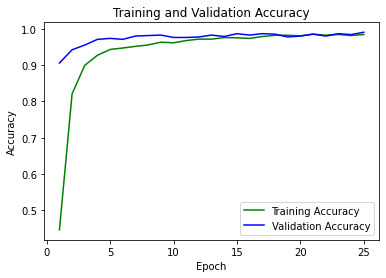

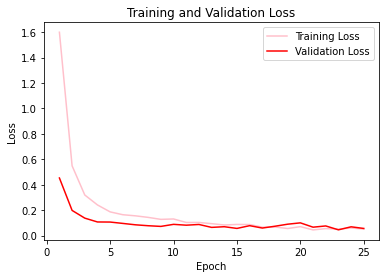

In [101]:
#Plot Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Evaluation of the Classifier Success with Cross-Validation

In [102]:
def create_model5():

    num__of_digits = 10

    # We add Dropout layers to prevent overfitting.

    model5 = Sequential()
    model5.add(Dense(200, input_dim=64, activation='relu', name='Hidden_Layer_1'))
    model5.add(Dropout(0.3))
    model5.add(Dense(100, activation='relu', name='Hidden_Layer_2'))
    model5.add(Dropout(0.3))
    model5.add(Dense(100, activation='relu', name='Hidden_Layer_3'))
    model5.add(Dropout(0.3))
    model5.add(Dense(200, activation='relu', name='Hidden_Layer_4'))
    model5.add(Dropout(0.3))
    model5.add(Dense(100, activation='relu', name='Hidden_Layer_5'))
    model5.add(Dense(num__of_digits, activation='softmax', name='Output_Layer'))

    # Input Layer - 5 Hidden Layer - Output Layer
    
    # Defining learning rate
    learning_rate = 0.01

    # We use Adam optimizer for Model 5.
    adam = optimizers.Adam(lr=learning_rate)

    model5.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model5

In [103]:
# Defining batch and epoch sizes
batch_size = 32
epochs = 25

classifier = KerasClassifier(build_fn=create_model5, batch_size=batch_size, epochs=epochs)
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10, verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
Epoch 1/25
86/86 [==============================] - 0s 1ms/step - loss: 2.1302 - accuracy: 0.2160
Epoch 2/25
86/86 [==============================] - 0s 986us/step - loss: 0.8323 - accuracy: 0.7183
Epoch 3/25
86/86 [==============================] - 0s 986us/step - loss: 0.3808 - accuracy: 0.8831
Epoch 4/25
86/86 [==============================] - 0s 986us/step - loss: 0.2927 - accuracy: 0.9079
Epoch 5/25
86/86 [==============================] - 0s 997us/step - loss: 0.2351 - accuracy: 0.9271
Epoch 6/25
86/86 [==============================] - 0s 986us/step - loss: 0.1983 - accuracy: 0.9389
Epoch 7/25
86/86 [==============================] - 0s 997us/step - loss: 0.1682 - accuracy: 0.9545
Epoch 8/25
86/86 [==============================] - 0s 986us/step - loss: 0.1679 - accuracy: 0.9503
Epoch 9/25
86/86 [==============================] - 0s 1ms/step - loss: 0.1277 - accuracy: 0.9589
Epoch 10/25
86/86 [==============

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


86/86 [==============================] - 0s 1ms/step - loss: 2.1505 - accuracy: 0.2031
Epoch 2/25
86/86 [==============================] - 0s 962us/step - loss: 0.7607 - accuracy: 0.7450
Epoch 3/25
86/86 [==============================] - 0s 974us/step - loss: 0.4484 - accuracy: 0.8519
Epoch 4/25
86/86 [==============================] - 0s 986us/step - loss: 0.3409 - accuracy: 0.8941
Epoch 5/25
86/86 [==============================] - 0s 986us/step - loss: 0.2572 - accuracy: 0.9253
Epoch 6/25
86/86 [==============================] - 0s 974us/step - loss: 0.2095 - accuracy: 0.9364
Epoch 7/25
86/86 [==============================] - 0s 986us/step - loss: 0.2121 - accuracy: 0.9323
Epoch 8/25
86/86 [==============================] - 0s 1ms/step - loss: 0.1712 - accuracy: 0.9451
Epoch 9/25
86/86 [==============================] - 0s 1ms/step - loss: 0.1391 - accuracy: 0.9585
Epoch 10/25
86/86 [==============================] - 0s 1ms/step - loss: 0.1039 - accuracy: 0.9692
Epoch 11/25
86/86 

Epoch 1/25
86/86 [==============================] - 0s 974us/step - loss: 2.0979 - accuracy: 0.2466
Epoch 2/25
86/86 [==============================] - 0s 950us/step - loss: 0.7935 - accuracy: 0.7190
Epoch 3/25
86/86 [==============================] - 0s 962us/step - loss: 0.4369 - accuracy: 0.8561
Epoch 4/25
86/86 [==============================] - 0s 939us/step - loss: 0.2924 - accuracy: 0.9143
Epoch 5/25
86/86 [==============================] - 0s 939us/step - loss: 0.2041 - accuracy: 0.9337
Epoch 6/25
86/86 [==============================] - 0s 939us/step - loss: 0.1834 - accuracy: 0.9362
Epoch 7/25
86/86 [==============================] - 0s 939us/step - loss: 0.1627 - accuracy: 0.9470
Epoch 8/25
86/86 [==============================] - 0s 939us/step - loss: 0.1260 - accuracy: 0.9594
Epoch 9/25
86/86 [==============================] - 0s 927us/step - loss: 0.1514 - accuracy: 0.9534
Epoch 10/25
86/86 [==============================] - 0s 939us/step - loss: 0.0954 - accuracy: 0.9706

86/86 [==============================] - 0s 1ms/step - loss: 2.1035 - accuracy: 0.2321
Epoch 2/25
86/86 [==============================] - 0s 1ms/step - loss: 0.7493 - accuracy: 0.7430
Epoch 3/25
86/86 [==============================] - 0s 1ms/step - loss: 0.3548 - accuracy: 0.8861
Epoch 4/25
86/86 [==============================] - 0s 1ms/step - loss: 0.3046 - accuracy: 0.9054
Epoch 5/25
86/86 [==============================] - 0s 997us/step - loss: 0.2400 - accuracy: 0.9303
Epoch 6/25
86/86 [==============================] - 0s 997us/step - loss: 0.1787 - accuracy: 0.9443
Epoch 7/25
86/86 [==============================] - 0s 997us/step - loss: 0.1661 - accuracy: 0.9521
Epoch 8/25
86/86 [==============================] - 0s 1ms/step - loss: 0.1215 - accuracy: 0.9638
Epoch 9/25
86/86 [==============================] - 0s 1ms/step - loss: 0.1446 - accuracy: 0.9538
Epoch 10/25
86/86 [==============================] - 0s 1ms/step - loss: 0.1335 - accuracy: 0.9650
Epoch 11/25
86/86 [=====

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   29.3s finished


In [104]:
#Cross Validation Scores
accuracies

array([0.97058821, 0.9836601 , 0.97385621, 0.97712415, 0.96732026,
       0.97712415, 0.9836601 , 0.97712415, 0.99672133, 0.98360658])

In [105]:
print('Max Cross-validation Accuracy  (10-Fold) : ',max(accuracies))
print('Mean Cross-validation Accuracy (10-Fold) : ',accuracies.mean())

Max Cross-validation Accuracy  (10-Fold) :  0.9967213273048401
Mean Cross-validation Accuracy (10-Fold) :  0.9790785253047943


## Evaluating of the Model on the Test Set

In [106]:
model5.metrics_names

['loss', 'accuracy']

In [107]:
y_test = dataset_labels_test

#One-Hot Encoding with Keras
y_test = keras.utils.to_categorical(y_test)

model5.evaluate(X_test, y_test)

57/57 [==============================] - 0s 481us/step - loss: 0.1505 - accuracy: 0.9666


[0.15047882497310638, 0.9666110277175903]

In [109]:
predictions_test = model5.predict_classes(X_test)

In [110]:
predictions_test

array([0, 1, 2, ..., 8, 9, 8], dtype=int64)

In [111]:
predictions_test.shape

(1797,)

* ### Classification Report

In [112]:
print(classification_report(dataset_labels_test, predictions_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       178
           1       0.95      0.99      0.97       182
           2       0.99      0.98      0.99       177
           3       0.99      0.95      0.97       183
           4       0.96      0.99      0.98       181
           5       0.93      0.98      0.95       182
           6       0.99      0.98      0.99       181
           7       0.99      0.91      0.95       179
           8       0.94      0.93      0.93       174
           9       0.93      0.95      0.94       180

    accuracy                           0.97      1797
   macro avg       0.97      0.97      0.97      1797
weighted avg       0.97      0.97      0.97      1797



## Confusion Matrix

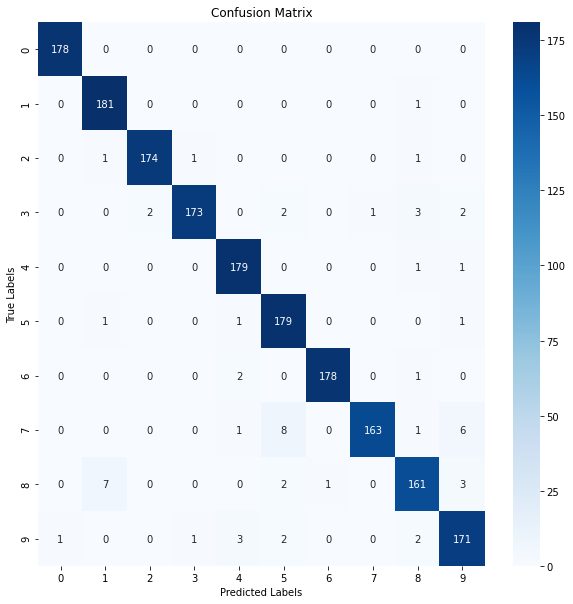

In [113]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Creating the confusion matrix
conf_matrix = confusion_matrix(dataset_labels_test, predictions_test)
f, ax = plt.subplots(figsize = (10,10))

sns.heatmap(conf_matrix, annot=True, fmt='.0f', ax = ax, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show();

## Classification of a New Sample whose Class is Unknown

In [114]:
def classification_model(features):
    df = pd.DataFrame(data=features)
    df = df.iloc[:,:].values.reshape(1,df.shape[0])
    
    #Normalization
    df = df.astype('float32')
    df /= 16
    
    return print('Predicted Value : ', model5.predict_classes(df))

Let be the properties entered by the user are as follows.

In [115]:
new_sample_feature_values = np.array([0,0,5,13,1,0,0,0,0,0,12,13,0,0,0,0,0,0,16,8,0,0,0,0,0,5,16,2,0,0,0,0,0,4,16,8,15,9,1,0,0,4,16,16,12,15,11,0,0,1,15,14,4,14,11,0,0,0,5,14,14,10,1,0])

In [117]:
classification_model(new_sample_feature_values)

Predicted Value :  [6]


Text(0.5, 1.0, 'Digit')

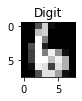

In [119]:
# Plotting entering sample matrix form

digit = new_sample_feature_values.reshape(8,8)

plt.figure(figsize=(1, 1))
plt.imshow(digit, cmap='gray')
plt.title("Digit")